# Project - Logistic Regression
## Phi Le
### DATA - 4319


Linear Regression is always used for representing the relationship between some continuous values. However, contrary to this Logistic Regression works on discrete values.

Logistic regression finds the most common application in solving binary classification problems, that is, when there are only two possibilities of an event, either the event will occur or it will not occur (0 or 1).

Thus, in Logistic Regression, we convert the predicted values into such values that lie in the range of 0 to 1 by using a non-linear transform function which is called a logistic function.

The logistic function results in an S-shaped curve and is therefore also called a Sigmoid function given by the equation,
$$
?(x) = \frac{1}{1+e^{-x}}
$$

![](https://i0.wp.com/techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/03/logistic-regressions.jpg?ssl=1)

The equation of Logistic Regression is,
$$
P(x) = \frac{e^{(b_0+b_1x)}}{1 + e^{(b_0+b_1x)}}
$$
Where $b_0$ and $b_1$ are coefficients and the goal of Logistic Regression is to find the value of these coefficients.



#### Information about the dataset

The dataset we are going to use is a Heart Attack directory from Kaggle (https://www.kaggle.com/imnikhilanand/heart-attack-prediction/data?select=data.csv). The goal of the project is to predict the binary target, whether the patient has heart disease or not.

### Import Python Librabries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


### Explore and Clean the Data

In [2]:
#Explore the data
df = pd.read_csv('data.csv', na_values='?')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

‘num ‘ is the target, a value of 1 shows the presence of heart disease in the patient, otherwise 0.

Let’s rename the target variable num to target, and also print out the classes and their counts.

In [3]:
df = df.rename(columns={'num       ': 'target'})

df['target'].value_counts(dropna=False)

0    188
1    106
Name: target, dtype: int64

In [4]:
#Summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


To keep the cleaning process simple, we’ll remove:

    the columns with many missing values, which are slope, ca, thal.
    the rows with missing values.

In [5]:
df = df.drop(['slope', 'ca', 'thal'], axis=1)

df = df.dropna().copy()

In [6]:
#Recheck the summary to make sure the dataset is cleaned.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


### Transform the Categorical Variables: Creating Dummy Variables

Among the five categorical variables, sex, fbs, and exang only have two levels of 0 and 1, so they are already in the dummy variable format. But we still need to convert cp and restecg into dummy variables.

Let’s take a closer look at these two variables.

In [7]:
df['cp'].value_counts(dropna=False)

df['restecg'].value_counts(dropna=False)

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

There are four classes for cp and three for restecg.

We can use the get_dummies function to convert them into dummy variables. The drop_first parameter is set to True so that the unnecessary first level dummy variable is removed.

In [8]:
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)

df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


In [9]:
#numeric columns and categorical columns as numeric_cols and cat_cols below.
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['cp_2', 'cp_3', 'cp_4', 'exang', 'fbs', 'restecg_1.0', 'restecg_2.0', 'sex']


### Split Training and Test Datasets

In [10]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=412, stratify=df['target'])

print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(208, 14)
(53, 14)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


### Transform the Numerical Variables: Scaling

In [11]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

### Fit the Logistic Regression Model

In [12]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(penalty='none')

### Evaluate the Model

In [13]:
#Scaled test dataset
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

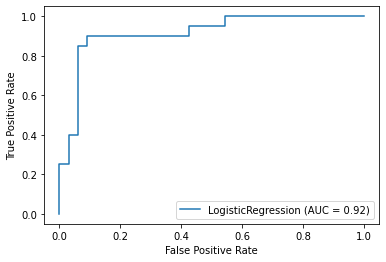

In [14]:
#ROC curve
plot_roc_curve(clf, X_test, y_test)

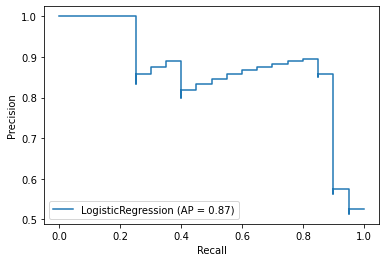

In [15]:
#precision-recall curve
plot_precision_recall_curve(clf, X_test, y_test)

In [16]:
#Get prediction

test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [17]:
#Other evaluations
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.50962
AUC = 0.91515
Average Precision = 0.86714

Using 0.5 as threshold:
Accuracy = 0.79245
Precision = 0.66667
Recall = 0.90000
F1 score = 0.76596

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.67      0.90      0.77        20

    accuracy                           0.79        53
   macro avg       0.79      0.81      0.79        53
weighted avg       0.83      0.79      0.80        53



Confusion Matrix


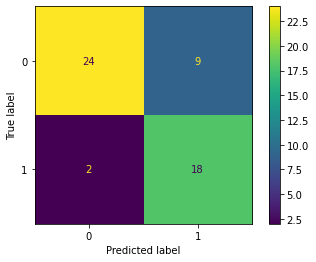

In [ ]:
#Confusion Matrix

print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)